Ydata Profiling of red_wine.csv

In [1]:
import pandas as pd
from ydata_profiling import ProfileReport
df = pd.read_csv("red_wine.csv")
profile = ProfileReport(df, title="Profiling Report")
profile.to_notebook_iframe()

C:\Users\Brett\anaconda3\Lib\site-packages\numba\core\decorators.py:262: NumbaDeprecationWarning: numba.generated_jit is deprecated. Please see the documentation at: https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-generated-jit for more information and advice on a suitable replacement.
  warnings.warn(msg, NumbaDeprecationWarning)
C:\Users\Brett\anaconda3\Lib\site-packages\visions\backends\shared\nan_handling.py:50: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @nb.jit


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Fit Baseline model with 10-Fold Cross-Validation

In [13]:
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn.dummy import DummyClassifier
from sklearn.metrics import roc_auc_score, accuracy_score
from sklearn.preprocessing import LabelEncoder

# Load the dataset
data = pd.read_csv('red_wine.csv')

# Encode the 'type' column to binary values (0 for 'low', 1 for 'high')
label_encoder = LabelEncoder()
data['type'] = label_encoder.fit_transform(data['type'])

# Define the features and target variable
X = data[['citric acid', 'sulphates', 'alcohol']]
y = data['type']

# Initialize the DummyClassifier
dummy_classifier = DummyClassifier(strategy='most_frequent')

# Perform 10-fold cross-validation and get AUC and Accuracy scores
auc_scores = cross_val_score(dummy_classifier, X, y, cv=10, scoring='roc_auc')
accuracy_scores = cross_val_score(dummy_classifier, X, y, cv=10, scoring='accuracy')

# Calculate the mean AUC and Accuracy
mean_auc = auc_scores.mean()
mean_accuracy = accuracy_scores.mean()

print("Mean AUC:", mean_auc)
print("Mean Accuracy:", mean_accuracy)


Mean AUC: 0.5
Mean Accuracy: 0.528886872353297


Fit Logistic Regression model with 10-Fold Cross-Validation

In [3]:
import pandas as pd
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, accuracy_score
from sklearn.preprocessing import LabelEncoder

# Load the Dataset
data = pd.read_csv('red_wine.csv')

# Convert 'type' to binary (0 for 'low' and 1 for 'high')
le = LabelEncoder()
data['type'] = le.fit_transform(data['type'])

# Select the predictor variables (X) and the target variable (y)
X = data[['citric acid', 'sulphates', 'alcohol']]
y = data['type']

model = LogisticRegression()

# Perform 10-fold cross-validation
auc_scores = cross_val_score(model, X, y, cv=10, scoring='roc_auc')
accuracy_scores = cross_val_score(model, X, y, cv=10, scoring='accuracy')

# Calculate the mean AUC and Accuracy across the 10 folds
mean_auc = auc_scores.mean()
mean_accuracy = accuracy_scores.mean()

print("Mean AUC:", mean_auc)
print("Mean Accuracy:", mean_accuracy)


Mean AUC: 0.8799019697944429
Mean Accuracy: 0.7847852389594676


Fit Naive Bayes model with 10-Fold Cross-Validation

In [4]:
import pandas as pd
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_auc_score, accuracy_score

# Load the dataset
data = pd.read_csv('red_wine.csv')

# Extract the features and target
X = data[['citric acid', 'sulphates', 'alcohol']]
y = data['type']

# Initialize the Naive Bayes model
naive_bayes = GaussianNB()

# Create a 10-fold cross-validation strategy
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Perform cross-validation and store the results
auc_scores = cross_val_score(naive_bayes, X, y, cv=cv, scoring='roc_auc')
accuracy_scores = cross_val_score(naive_bayes, X, y, cv=cv, scoring='accuracy')

# Calculate the mean AUC and Accuracy
mean_auc = auc_scores.mean()
mean_accuracy = accuracy_scores.mean()

print("Mean AUC:", mean_auc)
print("Mean Accuracy:", mean_accuracy)


Mean AUC: 0.8932910578071869
Mean Accuracy: 0.8247731397459164


Fit Decision Tree model with 10-Fold Cross-Validation

In [9]:
import pandas as pd
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.preprocessing import LabelEncoder

# Load the dataset
data = pd.read_csv('red_wine.csv')

# Encode the 'type' column
le = LabelEncoder()
data['type'] = le.fit_transform(data['type'])

# Split the data into features (X) and the target variable (y)
X = data[['citric acid', 'sulphates', 'alcohol']]
y = data['type']

# Create a Decision Tree classifier
dt_classifier = DecisionTreeClassifier()

# Perform 10-fold cross-validation and calculate AUC and Accuracy
auc_scores = cross_val_score(dt_classifier, X, y, cv=10, scoring='roc_auc')
accuracy_scores = cross_val_score(dt_classifier, X, y, cv=10, scoring='accuracy')

mean_auc = auc_scores.mean()
mean_accuracy = accuracy_scores.mean()

print(f"Mean AUC: {mean_auc}")
print(f"Mean Accuracy: {mean_accuracy}")


Mean AUC: 0.7527047146401985
Mean Accuracy: 0.7532667876588022


Fit SVM model with 10-Fold Cross-Validation

In [11]:
import pandas as pd
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.svm import SVC
from sklearn.metrics import roc_auc_score, accuracy_score
from sklearn.preprocessing import LabelEncoder

# Load the dataset
data = pd.read_csv('red_wine.csv')

# Select the columns you mentioned
selected_columns = ['citric acid', 'sulphates', 'alcohol']

# Extract features and target variable
X = data[selected_columns]
y = data['type']

# Encode the 'type' column to numeric values ('low' as 0, 'high' as 1)
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Create an SVM classifier
svm_classifier = SVC(probability=True)

# Perform 10-fold cross-validation
scores = cross_val_score(svm_classifier, X, y, cv=10, scoring='accuracy')
auc_scores = cross_val_score(svm_classifier, X, y, cv=10, scoring='roc_auc')

# Calculate the mean AUC and Accuracy scores
mean_auc = auc_scores.mean()
mean_accuracy = scores.mean()

print(f'Mean AUC: {mean_auc}')
print(f'Mean Accuracy: {mean_accuracy}')


Mean AUC: 0.8689201360169102
Mean Accuracy: 0.5358439201451907


Fit Random Forrest model with 10-Fold Cross-Validation

In [12]:
import pandas as pd
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, accuracy_score
from sklearn.preprocessing import LabelEncoder

# Load the dataset
data = pd.read_csv('red_wine.csv')

# Select the columns you want to use for your model
features = ['citric acid', 'sulphates', 'alcohol']
target = 'type'

X = data[features]
y = data[target]

# Encode the 'type' column since it's categorical
le = LabelEncoder()
y = le.fit_transform(y)

# Initialize the Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Perform 10-fold cross-validation
cv_auc = cross_val_score(model, X, y, cv=10, scoring='roc_auc')
cv_accuracy = cross_val_score(model, X, y, cv=10, scoring='accuracy')

# Calculate the mean AUC and Accuracy from cross-validation
mean_auc = cv_auc.mean()
mean_accuracy = cv_accuracy.mean()

print("Mean AUC:", mean_auc)
print("Mean Accuracy:", mean_accuracy)



Mean AUC: 0.8990503323836657
Mean Accuracy: 0.8058076225045372


Plot ROC Curve Random Forrest

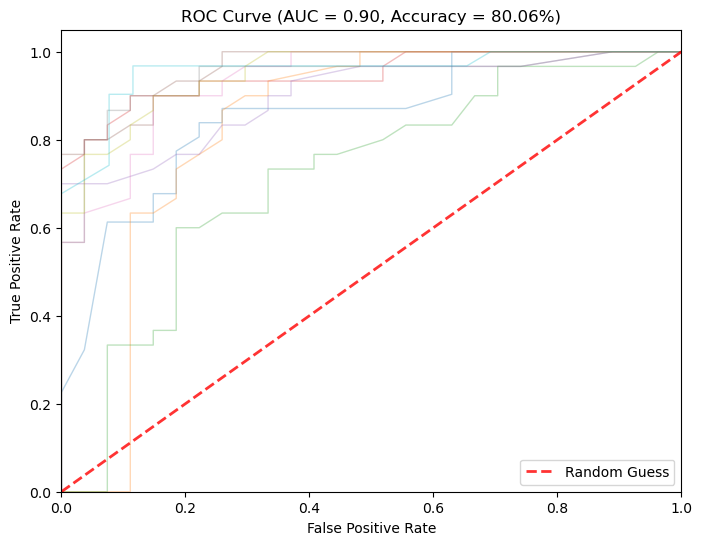

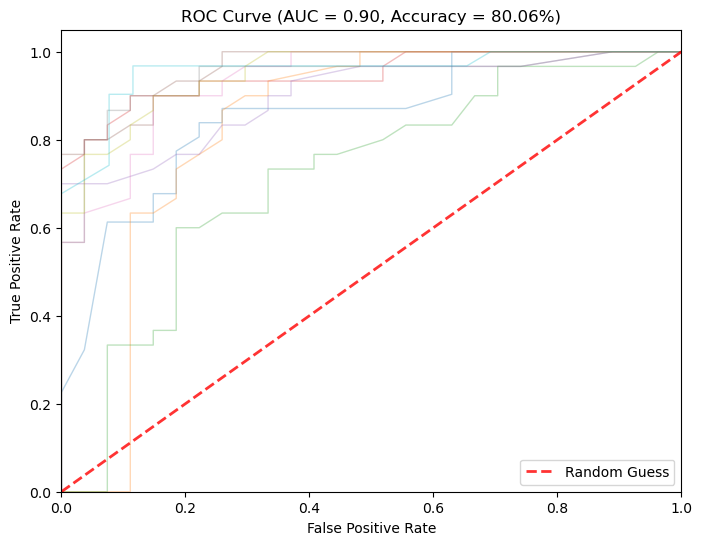

In [16]:
import pandas as pd
from sklearn.model_selection import cross_val_predict, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, accuracy_score, roc_curve, auc
%matplotlib inline
import matplotlib.pyplot as plt

data = pd.read_csv('red_wine.csv')
X = data[['citric acid', 'sulphates', 'alcohol']]
y = (data['type'] == 'high').astype(int)  # Convert 'type' to binary (1 for 'high' and 0 for 'low')

rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
cv = StratifiedKFold(n_splits=10)

auc_scores = []
accuracy_scores = []
mean_fpr = np.linspace(0, 1, 100)

plt.figure(figsize=(8, 6))

for train_index, test_index in cv.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    rf_classifier.fit(X_train, y_train)
    y_pred_prob = rf_classifier.predict_proba(X_test)[:, 1]

    fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
    roc_auc = auc(fpr, tpr)

    auc_scores.append(roc_auc)
    accuracy = accuracy_score(y_test, (y_pred_prob > 0.5).astype(int))
    accuracy_scores.append(accuracy)

    plt.plot(fpr, tpr, lw=1, alpha=0.3)

# Calculate the mean AUC and accuracy
mean_auc = np.mean(auc_scores)
mean_accuracy = np.mean(accuracy_scores)

plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', label='Random Guess', alpha=.8)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'ROC Curve (AUC = {mean_auc:.2f}, Accuracy = {mean_accuracy:.2%})')
plt.legend(loc='lower right')
plt.show()


Fit Random Forrest model with 10-Fold Cross-Validation on white_wine.csv

In [17]:
import pandas as pd
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, accuracy_score
from sklearn.preprocessing import LabelEncoder

# Load the dataset
data = pd.read_csv('white_wine.csv')

# Select the columns you want to use for your model
features = ['citric acid', 'sulphates', 'alcohol']
target = 'type'

X = data[features]
y = data[target]

# Encode the 'type' column since it's categorical
le = LabelEncoder()
y = le.fit_transform(y)

# Initialize the Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Perform 10-fold cross-validation
cv_auc = cross_val_score(model, X, y, cv=10, scoring='roc_auc')
cv_accuracy = cross_val_score(model, X, y, cv=10, scoring='accuracy')

# Calculate the mean AUC and Accuracy from cross-validation
mean_auc = cv_auc.mean()
mean_accuracy = cv_accuracy.mean()

print("Mean AUC:", mean_auc)
print("Mean Accuracy:", mean_accuracy)

Mean AUC: 0.9666666666666668
Mean Accuracy: 0.9107142857142858
